# Introduction

## Contents

- [Importing data and cleaning](#Importing-libraries-and-datasets)
    - [Cleaning of general data](#Cleaning-of-general-data)
    - [Cleaning of data in each feature](#Cleaning-of-data-in-each-feature)
- [EDA](#EDA)
    - [Trend of resale price](#Trend-of-resale-price)
    - [Distribution of features](#Distribution-of-features)
    - [Correlation between features](#Correlation-between-features)

## Background

In many countries, public housing is often associated with affordable housing for low-income households who would otherwise have to live in undesirable and often overcrowded conditions. That was the objective of the Housing Development Board (HDB) in the 1960s as Singapore faced a housing crisis with many people living in unhygienic squatter settlements.   


However, with the recent COVID pandemic, it has disrupted the already scarce supply of HDB flats which have contributed to a rise in resale flat prices as well as long Build-To-Order (BTO) HDB  queues. 
Since 2020, disruptions from the Circuit Breaker, coupled with stringent safe
management measures imposed at worksites, global border restrictions, and the
tightening of border controls for workers from various countries, have [affected private
and public sector construction projects, including HDB projects.](https://www.hdb.gov.sg/cs/infoweb/-/media/doc/CCG/26082021_Annex.ashx)

While Singapore has primarily solved the housing crisis with [HDB flats now home to 80 per cent of Singapore’s population](https://www.channelnewsasia.com/commentary/hdb-resale-flats-million-dollar-1-5-listings-affordability-accessibility-3364966), affordability and accessibility have come to the forefront of discussion among policymakers and analysts amid a rise in the number of million-dollar resale flats in recent years.  

HDB have tasked to investigate on the possible reasons that influence resale flat prices so as to draft impactful policies and measures to cool prices. 

# Importing libraries and datasets

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/envs/dsi-sg/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Importing HDB dataset
HDB_df=pd.read_csv('data/train.csv')

/var/folders/g3/96mgjdps6rdd3p34rf7fbqbr0000gn/T/ipykernel_6799/1288352903.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  HDB_df=pd.read_csv('data/train.csv')


In [3]:
#Function to provide a quick overview on possible dupicated/null vales as well information on the dataset
def df_summary(df):
    print(f"Shape(col,rows): {df.shape}")
    print(f"Number of duplicates: {df.duplicated().sum()}")
    print('---'*20)
    print(f'Number of rows with each unqiue datatypes:\n{df.dtypes.value_counts()}')
    print('---'*20)
    print("Columns with missing values:")
    isnull_df = pd.DataFrame(df.isnull().sum()).reset_index()
    isnull_df.columns = ['col','num_nulls']
    isnull_df['perc_null'] = ((isnull_df['num_nulls'])/(len(df))).round(2)
    print(isnull_df[isnull_df['num_nulls']>0])

Having a look at the first 5 entries in the dataset

In [4]:
HDB_df.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


Summary of the dataset on whether are there duplicated or null rows as well as the shape and dtypes

In [5]:
df_summary(HDB_df)

Shape(col,rows): (150634, 77)
Number of duplicates: 0
------------------------------------------------------------
Number of rows with each unqiue datatypes:
int64      32
float64    25
object     20
dtype: int64
------------------------------------------------------------
Columns with missing values:
                      col  num_nulls  perc_null
45  Mall_Nearest_Distance        829       0.01
46       Mall_Within_500m      92789       0.62
47        Mall_Within_1km      25426       0.17
48        Mall_Within_2km       1940       0.01
50     Hawker_Within_500m      97390       0.65
51      Hawker_Within_1km      60868       0.40
52      Hawker_Within_2km      29202       0.19


Preliminary understanding of dataset:
- No duplicates
- Some null values columns that describe proximity to facilities to resale flats

# Data Cleaning

## Cleaning of general data

### Dealing with null values

As seen in the quick summary, the null values exist in the columns that describe the proximity of the resale flat to the facilities.

In [6]:
#Constructing list of columns with null values, excluding the column of 'Mall_Nearest_Distance'
facilities_count_col_list=list(HDB_df.columns[HDB_df.isnull().any()])[1:]
print(facilities_count_col_list)

#Closer look at these columns
HDB_df[facilities_count_col_list]

['Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km']


,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km
0,NaN,NaN,7.0,1.0,3.0,13.0
1,NaN,1.0,3.0,NaN,1.0,7.0
2,NaN,NaN,4.0,NaN,NaN,1.0
3,NaN,1.0,4.0,NaN,1.0,9.0
4,NaN,1.0,2.0,NaN,NaN,1.0
...,...,...,...,...,...,...
150629,NaN,4.0,6.0,NaN,1.0,3.0
150630,1.0,1.0,4.0,NaN,NaN,1.0
150631,NaN,NaN,2.0,NaN,NaN,4.0
150632,NaN,3.0,3.0,1.0,5.0,8.0


In [7]:
#Checking for discrepancy
bool_series1=(HDB_df['Mall_Within_500m']>HDB_df['Mall_Within_1km']) | (HDB_df['Mall_Within_1km']>HDB_df['Mall_Within_2km'])
bool_series1.value_counts()

False    150634
dtype: int64

Perhaps the null values in these columns were suppose to meant that there were zero number of facility in the range. 

This assumption is taken since for the null values is recorded for a closer proximity only but there will be a value for a wider proximity range. As shown above, there are also no rows where a closer proximity will have more amount of facilities than a wider proximity.

Thus, it is logical to refill these null values with zeros

In [8]:
#Replacing null values with zero
HDB_df[facilities_count_col_list]=HDB_df[facilities_count_col_list].fillna(0)

For the column that house the distance from resale flat to nearest mall, the entries with null values are dropped

In [9]:
#Dropping null values
HDB_df.dropna(subset=['Mall_Nearest_Distance'],axis=0, inplace=True)

In [10]:
#Reseting index
HDB_df.reset_index(drop=True, inplace=True)

In [11]:
#Checking if null values in any columns again
HDB_df.columns[HDB_df.isnull().any()]

Index([], dtype='object')

No columns have null values anymore

### Dealing with duplicated rows

In [12]:
#Checking if there are duplicated rows
HDB_df.duplicated().any()

False

No duplicated rows found in the dataset

Checking for datatypes and its values will be done individually for each column in the next section

## Cleaning of data in each feature

### Dealing with redundant/irrelevant/potentially problematic columns

Certain columns that have similar information as other columns:

- id (not necessary to have another set of indexing)
- Tranc_YearMonth (existing record of transaction period in Year and Month individually)
- storey_range (inconsistent ranges across different flats)
- full_flat_type (existing record of flat type and model individually)
- floor_area_sqft (existing record of floor area in metres)
- address (Existing record of Longitude and Latitude capturing geographical location of resale flat)
- postal (Existing multiple variables to capture resale flat geographical location)
- mrt_latitude (specific location of mrt station logically should not be important as proximity is accounted for under the variable of mrt_nearest_distance and level of interconnection with other station is accounted under mrt_name)
- mrt_longitude (similar reason on dropping of mrt_latitude)
- bus_stop_name (dropped since it do not capture effectively on the level of interconnection of various bustops since the entries are not unique, unlike mrt_name)
- bus_stop_latitude (same reason on why mrt coordinates are dropped)
- bus_stop_longitude (same reason on why mrt coordinates are dropped)
- pri_sch_latitude (geographical location of school are also represented based on school name)
- pri_sch_longitude (same reason for the drop of pri_sch_latitude)
- cutoff_point (aggregate score are expected to be strongly related to sec_sch_name thus to prevent multicollinearity, this variable is dropped)
- affiliation (redundant as pri_sch_affiliation already captured the same parameter)
- sec_sch_latitude (same reason for the drop of pri_sch_latitude)
- sec_sch_longitude (same reason for the drop of pri_sch_latitude)

In [13]:
#Dropping redundant columns
columns_dropped=['id', 'Tranc_YearMonth', 'storey_range','full_flat_type', 'mid','floor_area_sqft', 'address', 'postal', 'mrt_latitude', 'mrt_longitude', 'bus_stop_name', 'bus_stop_latitude', 'bus_stop_longitude', 'pri_sch_latitude', 'pri_sch_longitude', 'cutoff_point', 'affiliation', 'sec_sch_latitude', 'sec_sch_longitude']
HDB_df.drop(columns=columns_dropped, inplace=True)

#### Column 01: town 

In [14]:
#Inspecting unique values
HDB_df['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

No unusal data entry

#### Column 02: flat_type 

In [15]:
#Inspecting unique values
HDB_df['flat_type'].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

No unusal data entry

#### Column 03: block 

In [16]:
#Peek into some values in the column
HDB_df['block'].unique()

array(['3B', '153', '289B', ..., '174C', '640A', '10C'], dtype=object)

In [17]:
#Checking if all values are alpha numeric
block_vals=HDB_df['block'].unique()
[i for i in block_vals if not i.isalnum()]

[]

No strings that consist of white space or non alphanumeric characters

#### Column 04: street_name 

In [18]:
#Peek into some values in the column
HDB_df['street_name'].unique()

array(['UPP BOON KENG RD', 'BISHAN ST 13', 'BT BATOK ST 25',
       'BISHAN ST 22', 'YISHUN ST 81', 'ALJUNIED CRES', 'HOUGANG AVE 8',
       'BEDOK RESERVOIR RD', 'SIN MING AVE', 'ANCHORVALE RD',
       'COMPASSVALE LINK', 'TAMPINES ST 41', 'SERANGOON NTH AVE 1',
       'HAVELOCK RD', 'SEGAR RD', 'PENDING RD', 'WOODLANDS ST 31',
       'YISHUN AVE 4', 'WOODLANDS DR 53', 'FERNVALE RD',
       'WOODLANDS ST 41', 'HOUGANG ST 51', 'PIPIT RD', 'WOODLANDS DR 75',
       'JURONG WEST ST 61', 'BT BATOK ST 24', 'TOA PAYOH NTH',
       'YUNG LOH RD', 'CHOA CHU KANG AVE 4', 'WELLINGTON CIRCLE',
       'JLN RAJAH', 'COMPASSVALE ST', 'LOR 2 TOA PAYOH', 'KALLANG BAHRU',
       'CHOA CHU KANG CRES', 'ANG MO KIO AVE 1', 'MARSILING RD',
       'BT BATOK ST 21', 'DEPOT RD', 'SEMBAWANG CRES', 'WOODLANDS CIRCLE',
       'TAMPINES ST 23', 'POTONG PASIR AVE 1', 'CHOA CHU KANG LOOP',
       'KANG CHING RD', 'TAMPINES AVE 8', 'JURONG WEST ST 93',
       'EUNOS CRES', 'ANG MO KIO AVE 4', 'PASIR RIS ST 11', 'DO

In [19]:
#Checking for unusal values
streetname_vals=list(HDB_df['street_name'].unique())
unusual_streetname=[]
for i in streetname_vals:
    check=i.replace(' ', '')
    if not check.isalnum():
        unusual_streetname.append(i)

In [20]:
unusual_streetname

["C'WEALTH DR",
 "JLN MA'MOR",
 "C'WEALTH AVE WEST",
 "ST. GEORGE'S RD",
 "ST. GEORGE'S LANE",
 "QUEEN'S CL",
 "C'WEALTH CL",
 "C'WEALTH CRES",
 "KING GEORGE'S AVE",
 "QUEEN'S RD",
 "C'WEALTH AVE"]

No unusual values in the list, such values got filtered due to the apostrophe in the names

#### Column 05: floor_area_sqm

In [21]:
#Peek into some values in the column
HDB_df['floor_area_sqm'].unique()

array([ 90. , 130. , 144. , 103. ,  83. ,  65. , 120. ,  68. , 125. ,
       110. ,  69. ,  94. ,  91. ,  73. , 119. , 123. , 121. , 135. ,
       148. , 111. , 104. , 107. , 105. , 139. , 115. , 122. ,  67. ,
        72. ,  99. ,  84. , 124. ,  89. , 112. , 131. ,  88. , 100. ,
        92. ,  43. , 162. ,  61. ,  59. ,  82. , 126. ,  64. , 113. ,
       143. , 146. ,  87. ,  93. , 142. ,  45. ,  74. , 137. , 101. ,
        60. ,  96. , 109. , 117. , 108. ,  85. ,  81. ,  95. ,  62. ,
       138. ,  63. ,  60.3, 106. ,  86. , 149. ,  70. ,  66. , 114. ,
       102. , 189. , 116. , 177. , 128. , 147. , 133. ,  53. , 118. ,
        47. , 145. , 141. , 280. , 150. , 132. , 151. ,  44. ,  97. ,
        75. ,  49. , 127. , 154. , 157. ,  76. ,  46. , 155. ,  98. ,
        57. , 134. , 152. ,  71. ,  52. , 153. ,  34. ,  50. ,  63.1,
        31. , 243. , 140. , 129. ,  56. ,  40. , 163. ,  79. , 166. ,
        77. ,  78. , 176. , 161. ,  58. , 179. , 159. , 158. ,  41. ,
       174. , 184. ,

In [22]:
HDB_df[['floor_area_sqm']].describe()

,floor_area_sqm
count,149805.000000
mean,97.228022
std,24.438881
min,31.000000
25%,75.000000
50%,95.000000
75%,112.000000
max,280.000000


Nothing unusual and datatype is already in float

#### Column 06: flat_model 

In [23]:
#Peek into some values in the column
HDB_df['flat_model'].unique()

array(['Model A', 'Improved', 'Apartment', 'Simplified', 'New Generation',
       'Premium Apartment', 'Model A2', 'Maisonette', 'Standard', 'DBSS',
       'Terrace', 'Model A-Maisonette', 'Type S1',
       'Premium Apartment Loft', 'Adjoined flat', 'Multi Generation',
       'Type S2', 'Premium Maisonette', 'Improved-Maisonette', '2-room'],
      dtype=object)

Nothing unusual

#### Column 07: lease_commence_date 

In [24]:
#Peek into some values in the column
HDB_df['lease_commence_date'].unique()

array([2006, 1987, 1997, 1992, 1975, 1980, 1989, 2001, 2009, 1985, 2013,
       2002, 1993, 1998, 1988, 1999, 2005, 1996, 2004, 1973, 1984, 1974,
       1977, 1970, 1983, 2012, 1978, 1981, 1994, 1979, 2007, 1976, 1986,
       1969, 1971, 2003, 2016, 1967, 1982, 2000, 1990, 1991, 1995, 2008,
       2010, 2015, 2014, 1972, 1968, 1966, 2011, 2017, 2018])

Renaming column to year instead of date and leaving the datatype as int since the years will be transformed to dummy variables

In [25]:
#Renaming column
HDB_df.rename(columns={'lease_commence_date':'lease_commence_year'}, inplace=True)

#### Column 08: resale_price

In [26]:
#Peek into some values in the column
HDB_df['resale_price'].unique()

array([680000., 665000., 838000., ..., 737888., 304500., 375588.])

In [27]:
#Checking if there are unusual values
HDB_df[['resale_price']].describe()

,resale_price
count,1.498050e+05
mean,4.486621e+05
std,1.432125e+05
min,1.500000e+05
25%,3.460000e+05
50%,4.200000e+05
75%,5.200000e+05
max,1.258000e+06


Summary do not reflect outliers or any anomaly values

#### Column 9: Tranc_Year 

In [28]:
#Peek into some values in the column
HDB_df['Tranc_Year'].unique()

array([2016, 2012, 2013, 2017, 2018, 2020, 2014, 2015, 2019, 2021])

Nothing unusual and leaving datatype as int since transforming to dummy variables later on

#### Column 10: Tranc_Month 

In [29]:
#Peek into some values in the column
HDB_df['Tranc_Month'].unique()

array([ 5,  7,  4, 12,  1,  3,  6,  8, 10, 11,  9,  2])

Nothing unusual and leaving datatype as int since transforming to dummy variables later on

#### Column 11-13: mid_storey, lb_storey and ub_storey

##### column 11: mid_storey

In [30]:
#Peek into some values in the column
HDB_df['mid_storey'].unique()

array([11,  8, 14,  3,  2, 29, 20,  5, 17, 23, 18, 35, 26, 13, 38, 32, 44,
       41, 50, 47, 28, 33])

##### Column 12: lb_storey

In [31]:
#Peek into some values in the column
HDB_df['lower'].unique()

array([10,  7, 13,  1,  6, 28, 19,  4, 16, 22, 34, 25, 11, 37, 31, 43, 40,
       21, 49, 46, 26, 36])

In [32]:
#Renaming column for better intuition
HDB_df.rename(columns={'lower':'lb_storey'}, inplace=True)

Rename to lb_storey as lower bound storey range

##### Column 13: ub_storey

In [33]:
#Peek into some values in the column
HDB_df['upper'].unique()

array([12,  9, 15,  5,  3, 10, 30, 21,  6, 18, 24, 20, 36, 27, 39, 33, 45,
       42, 25, 51, 48, 40, 35])

In [34]:
#Renaming column for better intuition
HDB_df.rename(columns={'upper':'ub_storey'}, inplace=True)

Rename to ub_storey as upper bound storey range

In [35]:
#Checking for discrepancy in the range of stories
HDB_df[~((HDB_df['mid_storey']>HDB_df['lb_storey']) & (HDB_df['ub_storey']>HDB_df['mid_storey']))]

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,Tranc_Year,Tranc_Month,...,mrt_name,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name


No rows have any discrepancy

#### Column 14: hdb_age

In [36]:
#Peek into some values in the column
HDB_df['hdb_age'].unique()

array([15, 34, 24, 29, 46, 41, 32, 20, 12, 36,  8, 19, 28, 23, 33, 22, 16,
       25, 17, 48, 37, 47, 44, 51, 38,  9, 43, 40, 27, 42, 14, 45, 35, 52,
       50, 18,  5, 54, 39, 21, 31, 30, 26, 13, 11,  6,  7, 49, 53, 55, 10,
        4,  3])

Nothing unusual and already in int datatype

#### Column 15: max_floor_lvl

In [37]:
#Peek into some values in the column
HDB_df['max_floor_lvl'].unique()

array([25,  9, 16, 11,  4, 12, 17, 13, 36, 15, 24, 26, 14, 18, 19, 20, 10,
       30,  8, 40, 22, 21, 28, 27,  2, 29,  7, 31, 43, 38,  5, 23, 42, 35,
       50,  6, 34, 47,  3])

Nothing unusual and already in int datatype

#### Column 16: year_completed

In [38]:
#Peek into some values in the column
HDB_df['year_completed'].unique()

array([2005, 1987, 1996, 1990, 1974, 1986, 1980, 1988, 2000, 2008, 1984,
       2011, 1998, 2003, 1994, 2001, 1973, 1991, 1983, 1999, 1995, 1976,
       1969, 1982, 1997, 1985, 1992, 2010, 2002, 1977, 1979, 1993, 1978,
       1981, 2006, 2004, 1975, 1966, 1964, 1963, 2015, 1971, 1965, 2012,
       1989, 1962, 2007, 2014, 2013, 2009, 1959, 1972, 1968, 1967, 1970,
       1949, 2017])

Nothing unusual

#### Column removed: residential

In [39]:
#Peek into some values in the column
HDB_df['residential'].unique()

array(['Y'], dtype=object)

All entries are categorised under residential thus removing the column

In [40]:
#Dropping column
HDB_df.drop(columns=['residential'], inplace=True)

#### Column 17: commercial 

In [41]:
#Peek into some values in the column
HDB_df['commercial'].unique()

array(['N', 'Y'], dtype=object)

Nothing unusual

#### Column 18: market_hawker

In [42]:
#Peek into some values in the column
HDB_df['market_hawker'].unique()

array(['N', 'Y'], dtype=object)

Nothing unusual

#### Column 19: multistorey_carpark

In [43]:
#Peek into some values in the column
HDB_df['multistorey_carpark'].unique()

array(['N', 'Y'], dtype=object)

Nothing unusual

#### Column 20: precinct_pavilion

In [44]:
#Peek into some values in the column
HDB_df['precinct_pavilion'].unique()

array(['N', 'Y'], dtype=object)

Nothing unusual

#### Column 21: total_dwelling_units

In [45]:
#Peek into some values in the column
HDB_df['total_dwelling_units'].unique()

array([142, 112,  90,  75,  48, 193,  64, 132,  92,  96, 107, 175,  86,
       131,  73, 138, 173,  87,  50,  81, 152, 126, 284,  88, 113, 144,
       177,  82,  99, 143, 291, 119,  89,  98,  91, 110,  46,  65,  24,
       133,  74, 180, 188, 195, 117, 171, 244,  63, 150, 135, 156, 151,
       120, 333, 118,  97, 190, 266, 104,  52, 160,  60, 145,  78, 109,
       101, 153, 220,  84, 123, 155, 229, 154,  54, 231, 172,  66, 168,
       103, 267, 108, 206, 165, 147,  56,  94, 106,  61, 139, 115, 128,
       337, 192,  95, 438, 102,  70, 352, 202,  55, 157, 178, 111,  16,
       129, 258, 140,  47,  72, 234,  68, 278, 100, 182, 263, 218, 176,
       237, 141, 122, 136, 356,  27,  10,  32,  62, 196,  57, 127, 121,
        76, 124, 179, 260, 105, 332, 315, 199,  80,  83, 114,  40, 219,
       238, 207, 204, 230,  42, 146,   8,  93, 331, 235, 197, 149,  71,
       242, 499, 137,  17, 371, 162, 130, 296, 252, 270, 148,  51, 164,
       187, 134, 116,  49, 379, 158, 322, 215, 287, 232, 456,  3

In [46]:
#Checking for unusual numeric values
HDB_df[['total_dwelling_units']].describe()

,total_dwelling_units
count,149805.000000
mean,124.592070
std,58.309788
min,2.000000
25%,90.000000
50%,112.000000
75%,144.000000
max,570.000000


In [47]:
#Exploring address of unusually low dwelling units
HDB_df[HDB_df['total_dwelling_units']==2]

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,Tranc_Year,Tranc_Month,...,mrt_name,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name
76070,ANG MO KIO,3 ROOM,226E,ANG MO KIO AVE 1,66.0,Improved,1994,276800.0,2016,9,...,Ang Mo Kio,1,0,199.047391,299.880142,Ang Mo Kio Primary School,45,0,328.271509,Ang Mo Kio Secondary School
128986,BEDOK,EXECUTIVE,10C,BEDOK STH AVE 2,142.0,Apartment,1995,773000.0,2013,2,...,Bedok,1,0,283.774367,270.804283,Bedok Green Primary School,74,0,409.840257,Temasek Junior College
144098,ANG MO KIO,3 ROOM,226E,ANG MO KIO AVE 1,66.0,Improved,1994,285000.0,2012,4,...,Ang Mo Kio,1,0,199.047391,299.880142,Ang Mo Kio Primary School,45,0,328.271509,Ang Mo Kio Secondary School


Minimum total dwelling units seems to be suspiciously low at only 2 units. Further research indicates that such units are either shophouses or low rise buildings thus acceptable as valid entries

In [48]:
HDB_df.columns[21:29]

Index(['1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold',
       'exec_sold', 'multigen_sold', 'studio_apartment_sold'],
      dtype='object')

#### Column 22 to 29: 1room_sold, 2room_sold, 3room_sold, 4room_sold, 5room_sold, exec_sold, multigen_sold, studio_apartment_sold

In [49]:
##Peek into some values in the column
for i in HDB_df.columns[21:29]:
    print(f'Column name: {i}')
    print('--------------------')
    print(np.sort(HDB_df[i].unique()))
    print('--------------------')

Column name: 1room_sold
--------------------
[  0 255]
--------------------
Column name: 2room_sold
--------------------
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  63  64  65  66  68  69  70  72  75  76  77  78  80  81
  84  85  87  90  91  92  93  96  97  98 104 105 106 107 111 112 113 115
 120 126 128 144 153 160 225]
--------------------
Column name: 3room_sold
--------------------
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 

Nothing unusual

#### Column 30 to 33: 1room_rental, 2room_rental, 3room_rental, other_room_rental

In [50]:
#Peek into some values in the column
for i in HDB_df.columns[29:33]:
    print(f'Column name: {i}')
    print('--------------------')
    print(np.sort(HDB_df[i].unique()))
    print('--------------------')

Column name: 1room_rental
--------------------
[  0   5  16  20  36  48  57  84  91 110]
--------------------
Column name: 2room_rental
--------------------
[  0   1   2   3   4   5   6  15  16  20  41  42  45  48  57  58  63  64
  67  68  70  74  77  78  89  91  93 101 102 109 113 117 126 127 128 133
 134 138 139 149 157 180 219 254 260 271 386 452]
--------------------
Column name: 3room_rental
--------------------
[ 0  1  2  3  4  5  7 10 12 13 14 15 17 24]
--------------------
Column name: other_room_rental
--------------------
[0 1 2]
--------------------


Nothing unusual

#### Column 34 & 35: Latitude, Longitude

In [51]:
#Peek into some values in the column
for i in HDB_df.columns[33:35]:
    print(f'Column name: {i}')
    print('--------------------')
    print(np.sort(HDB_df[i].unique()))
    print('--------------------')

Column name: Latitude
--------------------
[1.27037951 1.27091871 1.27140883 ... 1.45654601 1.45665764 1.45707122]
--------------------
Column name: Longitude
--------------------
[103.6852284 103.6852343 103.6859308 ... 103.986846  103.9874628
 103.9878045]
--------------------


In [52]:
#Checking for unusual numeric values
HDB_df[['Latitude']].describe()

,Latitude
count,149805.000000
mean,1.366193
std,0.042871
min,1.270380
25%,1.336285
50%,1.363347
75%,1.393280
max,1.457071


In [53]:
#Checking for unusual numeric values
HDB_df[['Longitude']].describe()

,Longitude
count,149805.000000
mean,103.839322
std,0.072513
min,103.685228
25%,103.774856
50%,103.844894
75%,103.898737
max,103.987804


Latitude is within the range of -90 to 90 and Longitude is within range of -180 to 180, no anomaly

#### Column 36 : planning_area

In [54]:
#Peek into some values in the column
HDB_df['planning_area'].unique()

array(['Kallang', 'Bishan', 'Bukit Batok', 'Yishun', 'Geylang', 'Hougang',
       'Bedok', 'Sengkang', 'Tampines', 'Serangoon', 'Bukit Merah',
       'Bukit Panjang', 'Woodlands', 'Jurong West', 'Toa Payoh',
       'Choa Chu Kang', 'Sembawang', 'Novena', 'Ang Mo Kio', 'Pasir Ris',
       'Clementi', 'Punggol', 'Jurong East', 'Rochor', 'Queenstown',
       'Bukit Timah', 'Outram', 'Tanglin', 'Marine Parade',
       'Western Water Catchment', 'Downtown Core', 'Changi'], dtype=object)

Nothing unusual

#### Column 37 : Mall_Nearest_Distance

In [55]:
#Peek into some values in the column
HDB_df['Mall_Nearest_Distance'].unique()

array([1094.090418 ,  866.9414477, 1459.579948 , ...,  362.8644234,
       1034.645191 , 1699.150022 ])

In [56]:
#Checking for unusual numeric values
HDB_df[['Mall_Nearest_Distance']].describe()

,Mall_Nearest_Distance
count,149805.000000
mean,664.239826
std,368.739209
min,0.000000
25%,391.473823
50%,602.818388
75%,868.818288
max,3496.402910


Suspicious minimum distance to nearest mall of zero metres

In [57]:
#Exploring flats that have zero distance to nearest mall
HDB_df[HDB_df['Mall_Nearest_Distance']==0]

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,Tranc_Year,Tranc_Month,...,mrt_name,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name
441,WOODLANDS,5 ROOM,680,WOODLANDS AVE 6,123.0,Improved,1998,479888.0,2019,5,...,Admiralty,0,0,44.555637,283.774985,Greenwood Primary School,61,0,429.863620,Woodlands Ring Secondary School
3512,CHOA CHU KANG,5 ROOM,137,TECK WHYE LANE,120.0,Improved,1989,430000.0,2012,3,...,Bukit Panjang,1,1,189.439711,413.180046,Teck Whye Primary School,73,0,362.158091,Chua Chu Kang Secondary School
10018,JURONG WEST,5 ROOM,221,BOON LAY PL,109.0,Standard,1979,418000.0,2015,1,...,Lakeside,0,0,65.485775,396.050713,Boon Lay Garden Primary School,90,0,445.049959,River Valley High School
11629,CHOA CHU KANG,4 ROOM,137,TECK WHYE LANE,103.0,Model A,1989,388000.0,2012,8,...,Bukit Panjang,1,1,189.439711,413.180046,Teck Whye Primary School,73,0,362.158091,Chua Chu Kang Secondary School
31901,CHOA CHU KANG,4 ROOM,137,TECK WHYE LANE,106.0,Model A,1989,315000.0,2018,11,...,Bukit Panjang,1,1,189.439711,413.180046,Teck Whye Primary School,73,0,362.158091,Chua Chu Kang Secondary School
35492,JURONG WEST,5 ROOM,221,BOON LAY PL,109.0,Standard,1979,410000.0,2016,6,...,Lakeside,0,0,65.485775,396.050713,Boon Lay Garden Primary School,90,0,445.049959,River Valley High School
55464,WOODLANDS,5 ROOM,680,WOODLANDS AVE 6,123.0,Improved,1998,470000.0,2017,4,...,Admiralty,0,0,44.555637,283.774985,Greenwood Primary School,61,0,429.863620,Woodlands Ring Secondary School
57146,WOODLANDS,5 ROOM,680,WOODLANDS AVE 6,123.0,Improved,1998,435000.0,2017,1,...,Admiralty,0,0,44.555637,283.774985,Greenwood Primary School,61,0,429.863620,Woodlands Ring Secondary School
61096,WOODLANDS,4 ROOM,680,WOODLANDS AVE 6,101.0,Model A,1998,400000.0,2019,3,...,Admiralty,0,0,44.555637,283.774985,Greenwood Primary School,61,0,429.863620,Woodlands Ring Secondary School
66387,WOODLANDS,4 ROOM,680,WOODLANDS AVE 6,101.0,Model A,1998,430000.0,2012,10,...,Admiralty,0,0,44.555637,283.774985,Greenwood Primary School,61,0,429.863620,Woodlands Ring Secondary School


Further research shown that such resale flats are located above or in extreme close proximity of the mall thus data entries are accepted as valid

#### Column 38 to 40 : Mall_Within_500m, Mall_Within_1km , Mall_Within_2km

In [58]:
#Peek into some values in the column
for i in HDB_df.columns[37:40]:
    print(f'Column name: {i}')
    print('--------------------')
    print(np.sort(HDB_df[i].unique()))
    print('--------------------')

Column name: Mall_Within_500m
--------------------
[0. 1. 2. 3. 4. 5. 6.]
--------------------
Column name: Mall_Within_1km
--------------------
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
--------------------
Column name: Mall_Within_2km
--------------------
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 37. 38. 39. 40. 42. 43.]
--------------------


In [59]:
#Checking for discrepancy
HDB_df[(HDB_df['Mall_Within_500m']>HDB_df['Mall_Within_1km']) | (HDB_df['Mall_Within_1km']>HDB_df['Mall_Within_2km'])]

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,Tranc_Year,Tranc_Month,...,mrt_name,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name


No discrepancy and no anamoly

#### Column 41: Hawker_Nearest_Distance

In [60]:
#Peek into some values in the column
HDB_df['Hawker_Nearest_Distance'].unique()

array([ 154.7533573 ,  640.1519255 , 1762.082341  , ..., 1885.333485  ,
        517.4376119 ,   80.20482464])

In [61]:
#Checking for unusual numeric values
HDB_df[['Hawker_Nearest_Distance']].describe()

,Hawker_Nearest_Distance
count,149805.000000
mean,1167.736858
std,1071.185899
min,1.873295
25%,371.492143
50%,776.137748
75%,1671.774246
max,4816.062542


Abnormally low distance to nearest hawker with minimum value of 1.87m

In [62]:
#Exploring flats that have abnormally close distance to nearest hawker
HDB_df[HDB_df['Hawker_Nearest_Distance']<2]

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,Tranc_Year,Tranc_Month,...,mrt_name,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,sec_sch_name
34519,CENTRAL AREA,2 ROOM,32,NEW MKT RD,52.0,Standard,1983,318000.0,2020,10,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
50069,CENTRAL AREA,3 ROOM,32,NEW MKT RD,66.0,Standard,1983,390000.0,2021,1,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
51282,CENTRAL AREA,2 ROOM,32,NEW MKT RD,52.0,Standard,1983,363000.0,2013,9,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
52762,CENTRAL AREA,3 ROOM,32,NEW MKT RD,66.0,Standard,1983,428000.0,2017,1,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
68874,CENTRAL AREA,3 ROOM,32,NEW MKT RD,66.0,Standard,1983,470000.0,2012,11,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
69502,CENTRAL AREA,2 ROOM,32,NEW MKT RD,52.0,Standard,1983,295000.0,2017,8,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
70600,CENTRAL AREA,2 ROOM,32,NEW MKT RD,52.0,Standard,1983,318000.0,2018,6,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
72905,CENTRAL AREA,2 ROOM,32,NEW MKT RD,52.0,Standard,1983,300000.0,2014,11,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
96764,CENTRAL AREA,3 ROOM,32,NEW MKT RD,66.0,Standard,1983,392000.0,2015,6,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School
123554,CENTRAL AREA,2 ROOM,32,NEW MKT RD,52.0,Standard,1983,308000.0,2021,3,...,Chinatown,0,1,99.361489,1081.127506,Cantonment Primary School,58,0,635.25536,Outram Secondary School


Further research shown that flat is located in very close proximity of a hawker center thus these are valid entries

#### Column 42 to 46 : Hawker_Within_500, Hawker_Within_1km, Hawker_Within_2km, hawker_food_stalls, hawker_market_stalls

In [63]:
#Peek into some values in the column
for i in HDB_df.columns[41:46]:
    print(f'Column name: {i}')
    print('--------------------')
    print(np.sort(HDB_df[i].unique()))
    print('--------------------')

Column name: Hawker_Within_500m
--------------------
[0. 1. 2. 3. 4. 5.]
--------------------
Column name: Hawker_Within_1km
--------------------
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
--------------------
Column name: Hawker_Within_2km
--------------------
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]
--------------------
Column name: hawker_food_stalls
--------------------
[  0  10  16  18  21  24  28  29  30  31  32  36  37  39  40  41  42  43
  45  46  47  48  50  51  52  55  56  57  60  61  63  64  65  66  70  72
  79  80  82  83  84  86  87  88  96 103 106 112 119 123 168 226]
--------------------
Column name: hawker_market_stalls
--------------------
[  0  12  32  36  40  43  45  48  50  51  52  53  54  57  59  60  61  62
  63  66  68  71  74  75  77  78  80  82  83  84  86  87  89  92  94  95
  96  99 100 101 103 105 108 111 112 113 114 118 120 122 123 127 130 134
 135 143 144 146 147 148 154 158 166 167 169 170 259 284 302 477]
-------------------

No anomaly

#### Column 47 : mrt_nearest_distance

In [64]:
#Peek into some values in the column
HDB_df['mrt_nearest_distance'].unique()

array([ 330.08306897,  903.65970285, 1334.25119686, ...,  353.69836878,
        692.40012735,  403.26065207])

In [65]:
#Checking for unusual numeric values
HDB_df[['mrt_nearest_distance']].describe()

,mrt_nearest_distance
count,149805.000000
mean,764.021115
std,429.111674
min,21.971410
25%,458.086393
50%,681.853546
75%,974.299230
max,3544.504228


#### Column 48 : mrt_name

In [66]:
#Peek into some values in the column
HDB_df['mrt_name'].unique()

array(['Kallang', 'Bishan', 'Bukit Batok', 'Khatib', 'MacPherson',
       'Kovan', 'Bedok North', 'Marymount', 'Sengkang', 'Buangkok',
       'Tampines', 'Tiong Bahru', 'Bukit Panjang', 'Marsiling',
       'Woodlands South', 'Admiralty', 'Pioneer', 'Braddell', 'Lakeside',
       'Choa Chu Kang', 'Sembawang', 'Toa Payoh', 'Geylang Bahru',
       'Yew Tee', 'Ang Mo Kio', 'Telok Blangah', 'Tampines East',
       'Potong Pasir', 'Tampines West', 'Eunos', 'Yio Chu Kang',
       'Farrer Park', 'Bukit Gombak', 'Clementi', 'Yishun', 'Punggol',
       'Jurong East', 'Tanah Merah', 'Chinese Garden', 'Kembangan',
       'Pasir Ris', 'Jalan Besar', 'Hougang', 'Buona Vista', 'Kaki Bukit',
       'Cashew', 'Bedok', 'Boon Keng', 'Woodlands', 'Simei', 'Boon Lay',
       'Dakota', 'Redhill', 'Canberra', 'Beauty World', 'Commonwealth',
       'Lorong Chuan', 'Tai Seng', 'Bedok Reservoir', 'Holland Village',
       'Ubi', 'HarbourFront', 'Dover', 'Chinatown', 'Queenstown',
       'Mattar', 'one-north', '

No anomaly

#### Column 49 : bus_interchange

In [67]:
#Peek into some values in the column
HDB_df['bus_interchange'].unique()

array([0, 1])

In [68]:
#Changing to string values to capture as categorical variable for OneHotEncoding
HDB_df['bus_interchange'] = HDB_df['bus_interchange'].astype(str)

No anomaly

#### Column 50 : mrt_interchange

In [69]:
#Peek into some values in the column
HDB_df['mrt_interchange'].unique()

array([0, 1])

In [70]:
#Changing to string values to capture as categorical variable  for OneHotEncoding
HDB_df['mrt_interchange'] = HDB_df['mrt_interchange'].astype(str)

No anomaly

#### Column 51 : bus_stop_nearest_distance

In [71]:
#Peek into some values in the column
HDB_df['bus_stop_nearest_distance'].unique()

array([ 29.42739466,  58.20776077, 214.74785986, ..., 140.31579262,
        69.13918536,  98.25150295])

In [72]:
#Checking for unusual numeric values
HDB_df[['bus_stop_nearest_distance']].describe()

,bus_stop_nearest_distance
count,149805.000000
mean,115.194170
std,55.564721
min,9.001285
25%,74.959608
50%,107.686727
75%,146.624537
max,443.964584


No anomaly

#### Column 52: pri_sch_nearest_distance

In [73]:
#Peek into some values in the column
HDB_df['pri_sch_nearest_distance'].unique()

array([1138.63342159,  415.60735708,  498.84903875, ...,  549.83819733,
        379.95700696,  375.7819182 ])

In [74]:
#Checking for unusual numeric values
HDB_df[['pri_sch_nearest_distance']].describe()

,pri_sch_nearest_distance
count,149805.000000
mean,394.903494
std,234.186949
min,45.668324
25%,227.083163
50%,348.724666
75%,502.097957
max,3305.841039


No anomaly

#### Column 53: pri_sch_name

In [75]:
#Peek into some values in the column
HDB_df['pri_sch_name'].unique()

array(['Geylang Methodist School',
       'Kuo Chuan Presbyterian Primary School', 'Keming Primary School',
       'Catholic High School', 'Naval Base Primary School',
       "Saint Margaret's Primary School", 'Xinmin Primary School',
       'Damai Primary School', 'Ai Tong School',
       'Anchor Green Primary School', 'North Vista Primary School',
       'Tampines North Primary School', 'Rosyth School',
       'Alexandra Primary School', 'Beacon Primary School',
       'Zhenghua Primary School', 'Fuchun Primary School',
       'Guangyang Primary School', 'Woodlands Ring Primary School',
       'Fernvale Primary School', 'Palm View Primary School',
       'Greenwood Primary School', 'Frontier Primary School',
       'Lakeside Primary School', 'Chua Chu Kang Primary School',
       'Wellington Primary School', 'Hong Wen School',
       'Compassvale Primary School', 'Kheng Cheng School',
       'Bendemeer Primary School', 'Unity Primary School',
       'Ang Mo Kio Primary School', 'Mars

In [76]:
#Checking for unusal values
pri_name_vals=list(HDB_df['pri_sch_name'].unique())
unusual_sch_name=[]
for i in pri_name_vals:
    check=i.replace(' ', '')
    if not check.isalnum():
        unusual_sch_name.append(i)
print(unusual_sch_name)

["Saint Margaret's Primary School", "Saint Andrew's Junior School", "Saint Hilda's Primary School", "Saint Anthony's Primary School", "Holy Innocents' Primary School", "Paya Lebar Methodist Girls' School", "CHIJ Saint Nicholas Girls' School", "Saint Anthony's Canossian Primary School", "Saint Stephen's School", "Haig Girls' School", "Saint Joseph's Institution Junior", "Saint Gabriel's Primary School"]


No unusual anomaly as these entries consist of apostrophe

#### Column 54: vacancy

In [77]:
#Peek into some values in the column
HDB_df['vacancy'].unique()

array([ 78,  45,  39,  20,  74,  65,  48,  56,  30,  75,  79,  71,  54,
        72,  51,  46,  61,  67,  34,  63,  68,  85,  36,  55,  53,  50,
        38,  57,  26,  47,  40,  69,  91,  27,  62,  43,  64,  66,  49,
        52,  32,  84,  60,  44,  41,  25,  83,  23,  73,  92,  59,  90,
        29,  70,  82,  22,  93, 106,  33,  24,  76,  87,  58,  42, 110,
        37])

No anomaly

#### Column 55: pri_sch_affiliation

In [78]:
#Peek into some values in the column
HDB_df['pri_sch_affiliation'].unique()

array([1, 0])

No anomaly

#### Column 56: sec_sch_nearest_dist

In [79]:
#Peek into some values in the column
HDB_df['sec_sch_nearest_dist'].unique()

array([1138.63342159,  447.89439926,  180.07455778, ...,  310.51267058,
        175.71630041,  493.2696865 ])

In [80]:
#Checking for unusual numeric values
HDB_df[['sec_sch_nearest_dist']].describe()

,sec_sch_nearest_dist
count,149805.000000
mean,507.628791
std,308.752257
min,38.913475
25%,289.176378
50%,446.671027
75%,642.519665
max,3638.977233


No anomaly

#### Column 57: sec_sch_name

In [81]:
#Peek into some values in the column
HDB_df['sec_sch_name'].unique()

array(['Geylang Methodist School',
       'Kuo Chuan Presbyterian Secondary School',
       'Yusof Ishak Secondary School', 'Catholic High School',
       'Orchid Park Secondary School', 'Bowen Secondary School',
       'Damai Secondary School', 'Peirce Secondary School',
       'Nan Chiau High School', 'Seng Kang Secondary School',
       'Pasir Ris Secondary School', 'Serangoon Garden Secondary School',
       'Gan Eng Seng School', 'Zhenghua Secondary School',
       'Fajar Secondary School', 'Fuchun Secondary School',
       'Guangyang Secondary School', 'Woodgrove Secondary School',
       'Pei Hwa Secondary School', 'Montfort Secondary School',
       'Admiralty Secondary School', 'Jurong West Secondary School',
       'Jurong Secondary School', 'Bukit Panjang Government High School',
       'Canberra Secondary School', 'Bendemeer Secondary School',
       'Compassvale Secondary School', 'CHIJ Secondary',
       'Unity Secondary School', 'Ang Mo Kio Secondary School',
       'Bea

In [82]:
#Checking for unusal values
sec_name_vals=list(HDB_df['sec_sch_name'].unique())
unusual_sch_name=[]
for i in sec_name_vals:
    check=i.replace(' ', '')
    if not check.isalnum():
        unusual_sch_name.append(i)
print(unusual_sch_name)

["Saint Andrew's Secondary School", "Raffles Girls' School", "Saint Hilda's Secondary School", "Holy Innocents' High School", "CHIJ Saint Theresa's Convent", "Methodist Girls' School", "Paya Lebar Methodist Girls' School", "CHIJ Saint Joseph's Convent", "CHIJ Saint Nicholas Girls' School", "Saint Margaret's Secondary School", "Saint Anthony's Canossian Secondary School", "Cedar Girls' Secondary School", "Saint Gabriel's Secondary School", "Saint Patrick's School", "Crescent Girls' School", 'Anglo-Chinese School']


No unusual anomaly as these entries consist of apostrophe

In [84]:
print(f'After data cleaning, there are {HDB_df.shape[0]} rows and {HDB_df.shape[1]} features left')

After data cleaning, there are 149805 rows and 57 features left


## EDA

### Trends of resale price

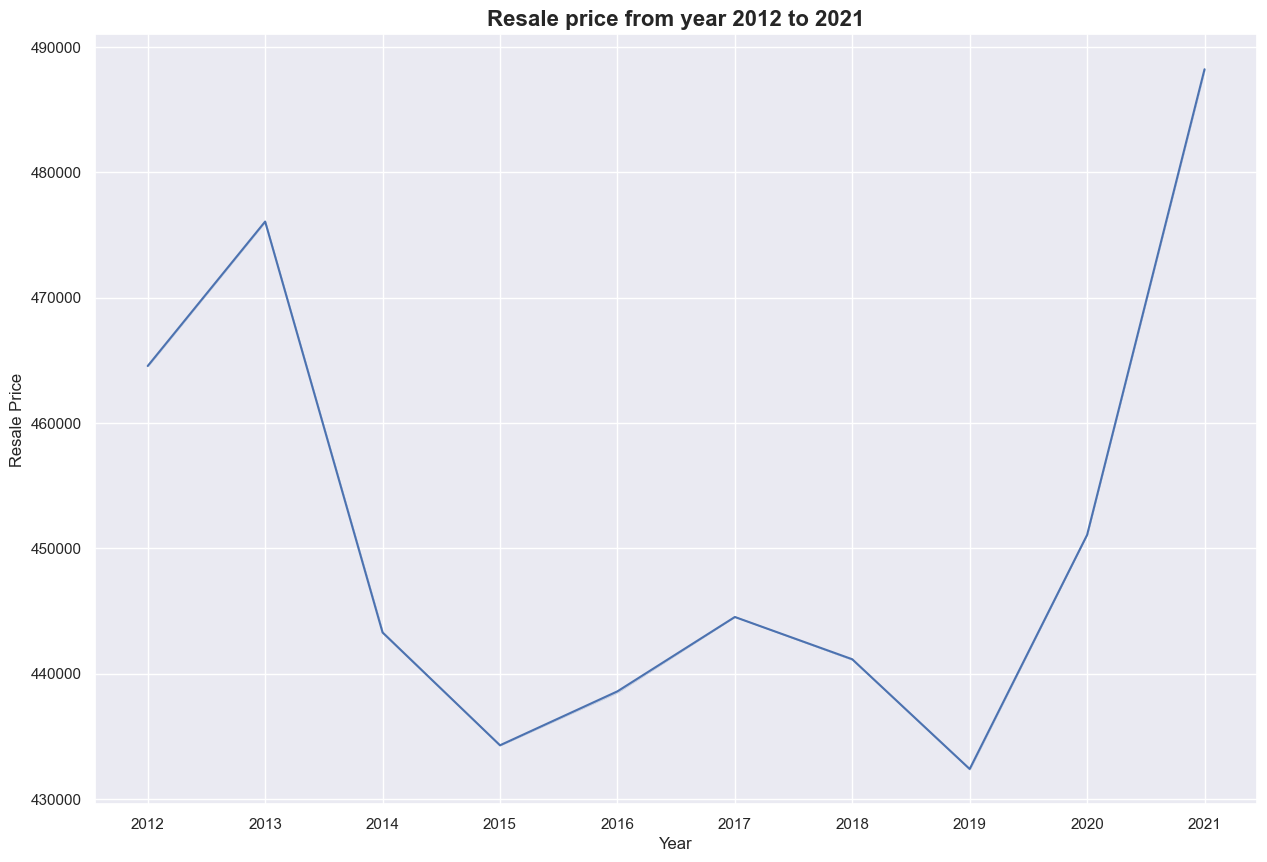

In [106]:
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.lineplot(data=HDB_df,x='Tranc_Year', y='resale_price', errorbar=('ci',False))

ax.set_title('Resale price from year 2012 to 2021', fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax.set(xlabel='Year', ylabel='Resale Price')
ax.set_xticks([i for i in range(2012, 2022)]);

Reason for dip in 2013 possibly due to:
- [Introduction of a '3 year wait rule' for PRs in Singapore to be eligible to purchase a HDB](https://sbr.com.sg/residential-property/news/hdb-resale-prices-drop-first-time-in-over-4-years)
- Total debt servicing ratio(TDSR) was introduced in 2013 that limits the amount of loans an individual can burden at a time at 60% of their gross monthly income thus limiting their ability to purchase resale flats

Reason for rise in 2020 onwards due to:
- COVID disrupting supply of BTO HDB flats with circuit breaker measures and manpower crunch


In [85]:
HDB_df.groupby('Tranc_Month')['resale_price'].describe()

,count,mean,std,min,25%,50%,75%,max
Tranc_Month,,,,,,,,
1,10844.0,449071.501925,144259.548307,150000.0,345000.0,422000.0,520000.0,1210000.0
2,9270.0,451562.573320,150411.023253,157000.0,345000.0,420000.0,525000.0,1210000.0
3,14362.0,451204.734421,143246.015987,160000.0,348888.0,425000.0,522000.0,1232000.0
4,13429.0,451937.424568,140148.892104,170000.0,350000.0,425000.0,520000.0,1200000.0
5,12036.0,449823.511798,139924.810075,165000.0,350000.0,420000.0,520000.0,1170000.0
6,13072.0,444454.947427,143236.905526,175000.0,342000.0,417500.0,513000.0,1188000.0
7,13816.0,444592.387423,140970.559266,160000.0,345000.0,420000.0,515000.0,1205000.0
8,13323.0,448429.062078,143219.516506,168000.0,348000.0,420000.0,520000.0,1200000.0
9,12610.0,447500.976795,144915.594653,160000.0,345000.0,420000.0,518000.0,1258000.0


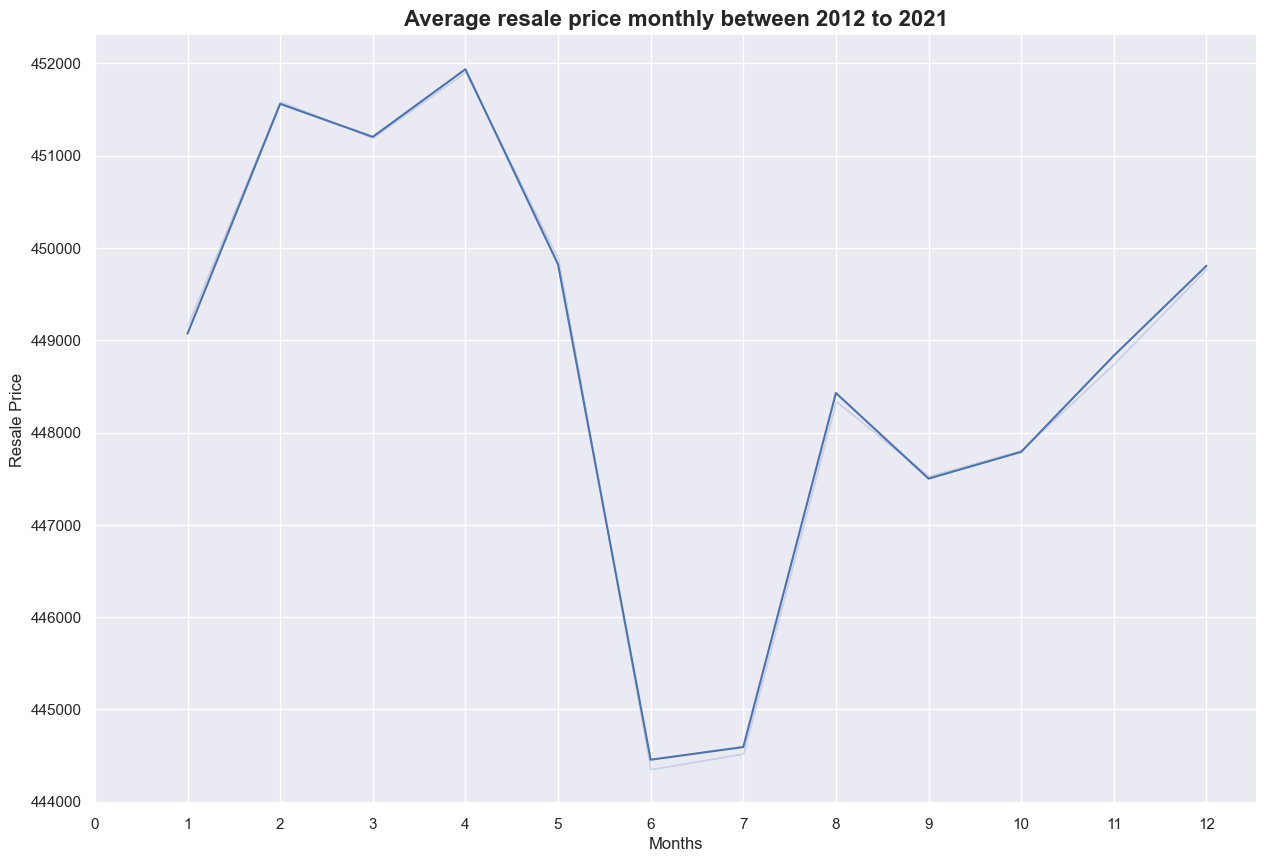

In [108]:
sns.set(rc={'figure.figsize':(15,10)})
ax2=sns.lineplot(data=HDB_df,x='Tranc_Month', y='resale_price', errorbar=('ci',False))

ax2.set_title('Average resale price monthly between 2012 to 2021', fontdict={'fontsize': 16, 'fontweight': 'bold'})
ax2.set(xlabel='Months', ylabel='Resale Price')
ax2.set_xticks([i for i in range(0, 13)]);

Based on monthyl year-on-year basis, it is observed that there is drop in prices in May but a rise starting in June till August.

Potential reasons to explore:

- Relation to school holidays in June where families in Singapore might have more time to view properties (November to December periods also display rise in prices)
- Relation to start of Singapores' universities semester in August which might drive demand for rent/purchase of resale flats



### Distribution of features

Summary of distribution of data of each predictor with continous data

#### Boxplot on numeric columns

In [87]:
#Constructing a list of the index of HDB_df.columns that contain continous data
num_col_list=[4,6,7,10,11,12,13,14,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,45,46,50,51,55]

In [88]:
plot_list=[]
for i in num_col_list:
    plot_list.append(HDB_df.columns[i])

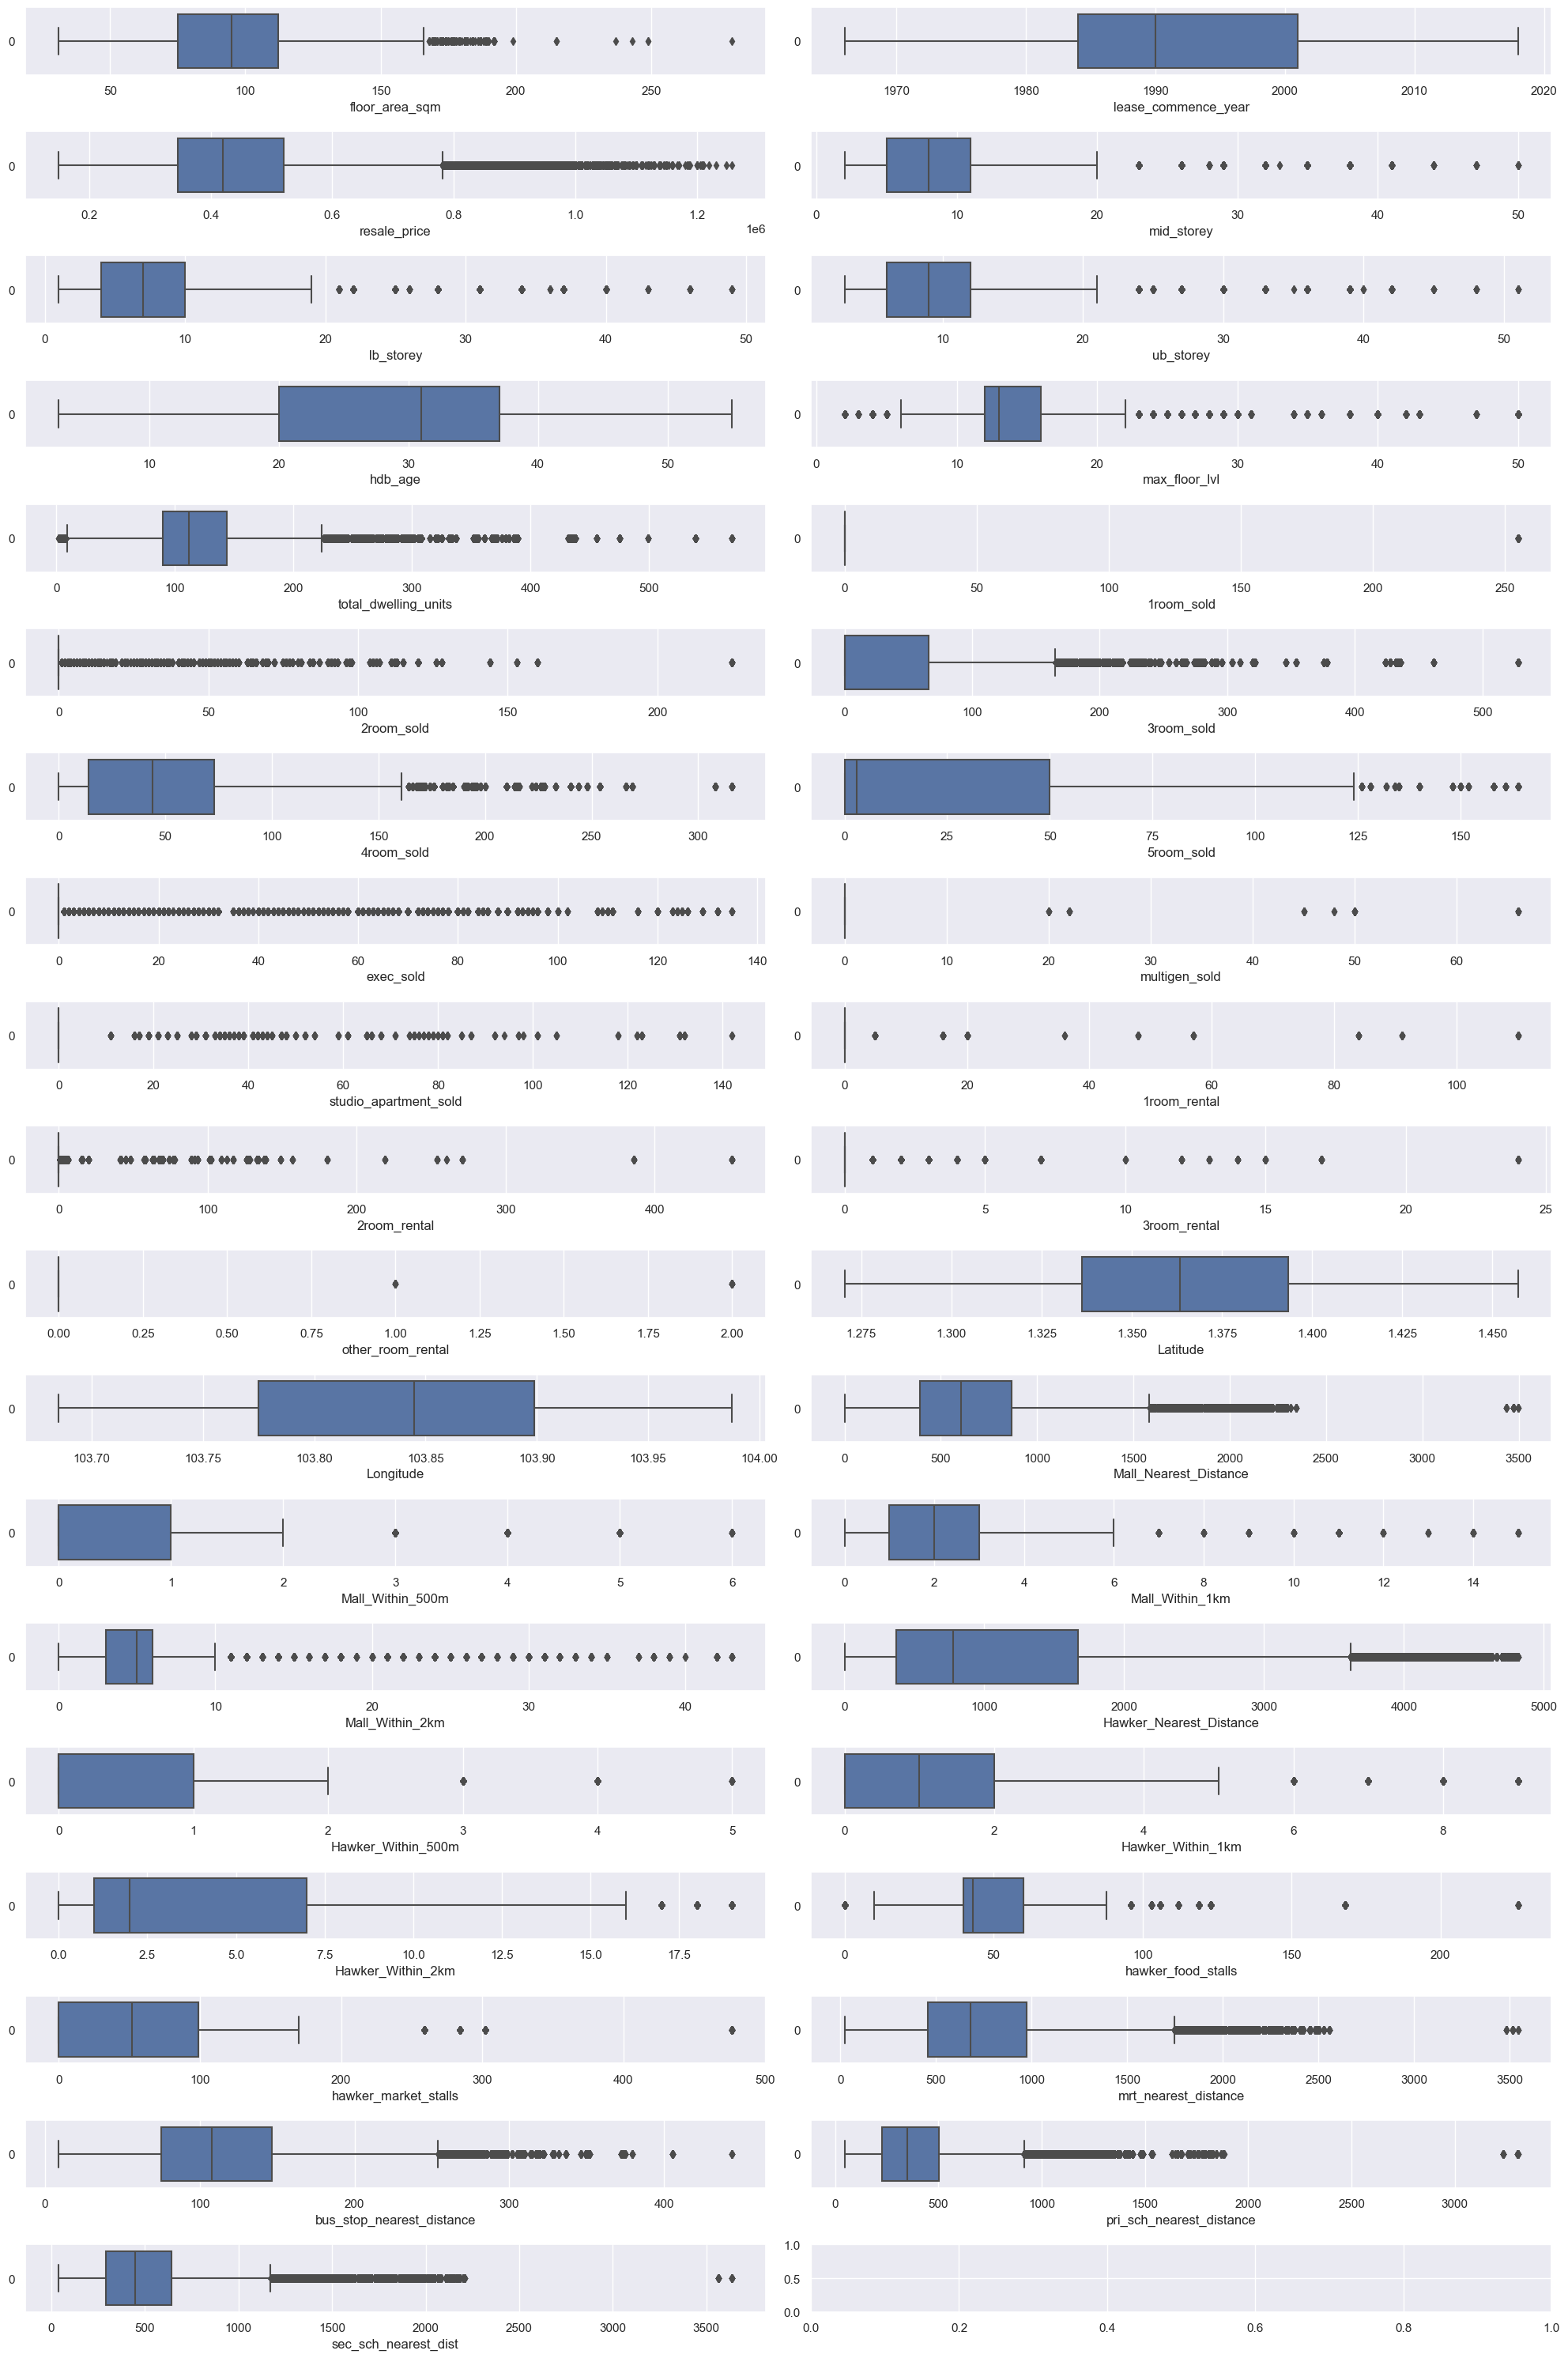

In [89]:
fig, axes = plt.subplots(19,2)
fig.set_size_inches(20, 30)

axes=axes.flatten()

for i,col in enumerate (plot_list):
    sns.boxplot(HDB_df[col], ax=axes[i], orient='h')
    axes[i].set_xlabel(col)

plt.tight_layout()

Conclusion: 
- Most of the feature's data have outliers as seen in the compilation of box plots above but due to the amount of data is available, we will ignore the outliers for now and consider to remove them if the need arise.
- Most features are also concluded visually to be not normally distributed.

### Correlation between features

#### Correlation to resale_price

To understand the degree of correlation between each feature and resale price

In [90]:
#Constructing the correlation dataframe
corr_df=HDB_df.corr()
corr_df_sorted=corr_df[['resale_price']].sort_values(by='resale_price', ascending=False)

In [91]:
#Columns with strong positive correlation to resale_price
corr_df_sorted.head(6)[1:]

,resale_price
floor_area_sqm,0.656776
max_floor_lvl,0.495537
5room_sold,0.360818
ub_storey,0.352152
year_completed,0.351797


These columns display highest positive correlation among all columns which preliminary suggest possibly significant explanatory power on HDB prices.

In [92]:
#Columns with strong negative correlation to resale_price
corr_df_sorted.tail(5).sort_values(by='resale_price')

,resale_price
3room_sold,-0.411948
hdb_age,-0.348430
Latitude,-0.215651
2room_sold,-0.146455
total_dwelling_units,-0.144782


Likewise, these columns suggest explanatory power on HDB prices 

In [93]:
#Columns with the relatively weaker correlation to resale_price
lower_bound=round(len(corr_df_sorted)*0.4)
upper_bound=round(len(corr_df_sorted)*0.6)

corr_df_sorted.iloc[lower_bound:upper_bound]

,resale_price
Mall_Within_1km,0.083842
studio_apartment_sold,0.041589
multigen_sold,0.037608
pri_sch_affiliation,0.031328
bus_stop_nearest_distance,0.030546
other_room_rental,0.013143
Hawker_Within_500m,0.013037
Tranc_Month,-0.005685


These columns have the lowest correlation among the columns, suggesting that possibly it has poor explanatory power on HDB prices.

#### Correlation between other features

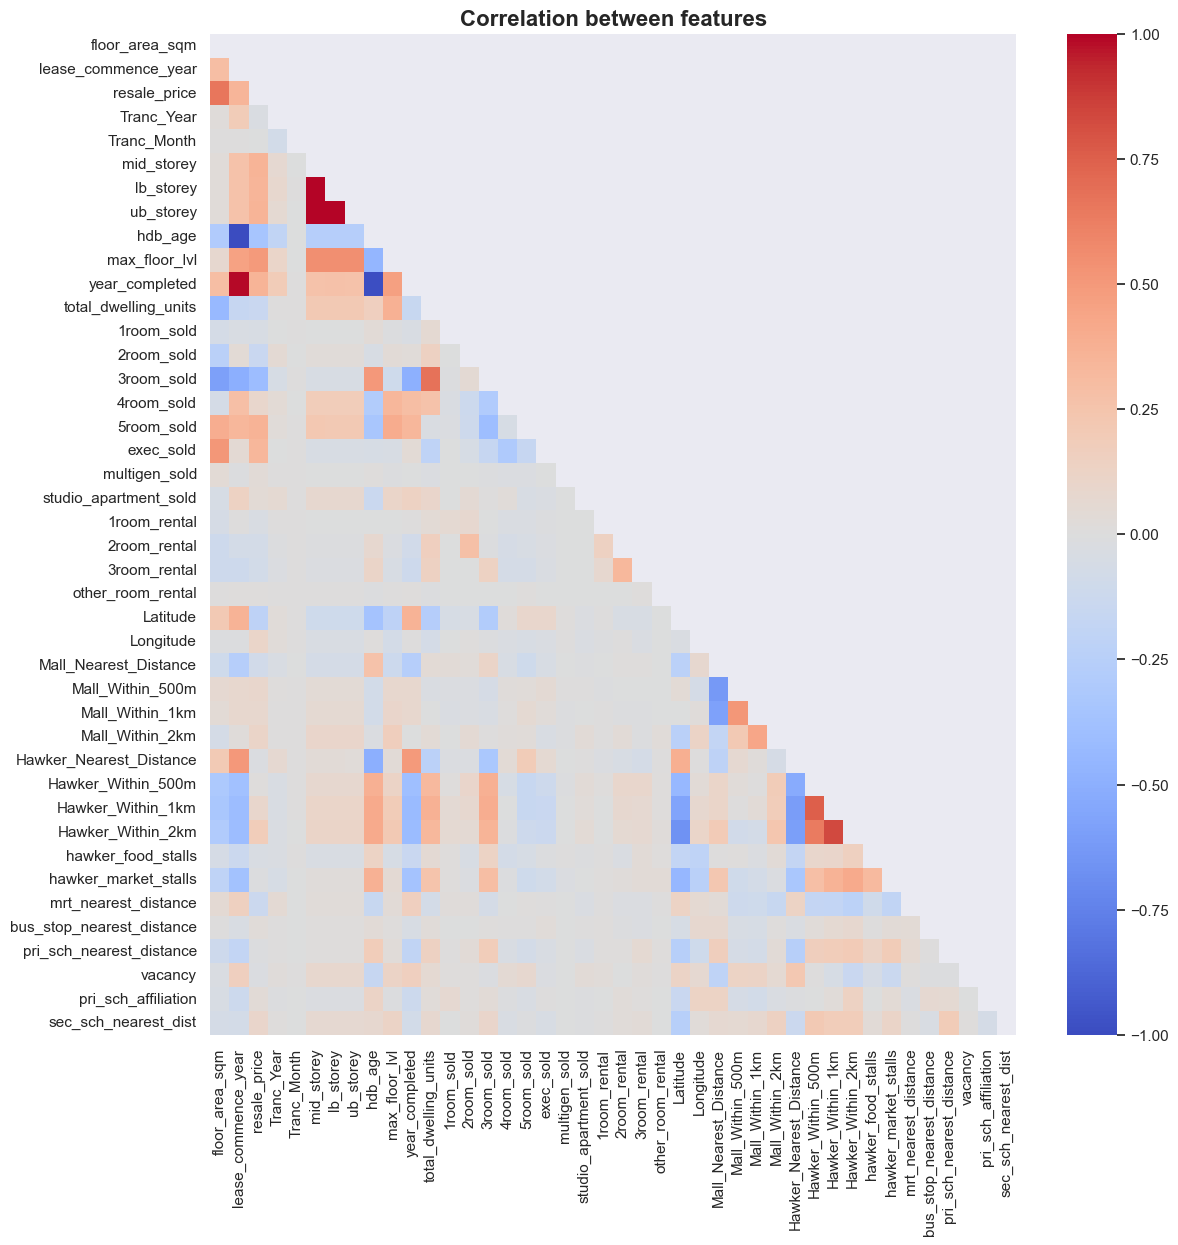

In [111]:
#Visualizing correlation between each features using heatmap
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

g=sns.heatmap(corr_df, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
sns.set(rc={'figure.figsize':(13,13)})
g.set_title('Correlation between features', fontdict={'fontsize': 16, 'fontweight': 'bold'});

In [95]:
#Constructing a sorted dataframe based on the correlation 
corr_stack=corr_df.stack().reset_index()
corr_stack.drop(corr_stack[corr_stack[0]==1].index,inplace=True)
corr_stack.rename(columns={'level_0':'feature01', 'level_1':'feature02', 0:'corr_coef'}, inplace=True)
corr_stack['abs_corr_coef']=np.abs(corr_stack['corr_coef'])

In [96]:
#Remove repeated rows due to mirrored correlation dataframe
corr_stack.drop_duplicates(subset='corr_coef',inplace=True)

In [97]:
corr_stack_sorted=corr_stack.sort_values(by=['abs_corr_coef'], ascending=False).head(20)
corr_stack_sorted

,feature01,feature02,corr_coef,abs_corr_coef
50,lease_commence_year,hdb_age,-1.000000,1.000000
216,mid_storey,lb_storey,0.999414,0.999414
217,mid_storey,ub_storey,0.999412,0.999412
259,lb_storey,ub_storey,0.997654,0.997654
52,lease_commence_year,year_completed,0.988677,0.988677
346,hdb_age,year_completed,-0.988677,0.988677
1377,Hawker_Within_1km,Hawker_Within_2km,0.830123,0.830123
1334,Hawker_Within_500m,Hawker_Within_1km,0.756713,0.756713
476,total_dwelling_units,3room_sold,0.678721,0.678721
1041,Latitude,Hawker_Within_2km,-0.667440,0.667440


Conclusion: Based on the correlation, certain highlighted features posed limited explanatory power to HDB prices which will be considered to be drop. However, further hypothesis testing have to be conducted before doing so.

Correlation heatmap display that most of the columns are not correlated with each other with the exception of a handful of it suggesting possible multicollinearity. These columns might be dropped for the improvement of models. Simiarly, further hypothesis testing have to be conducted before doing so.

In [98]:
#Exporting HDB_df
HDB_df.to_csv('HDB_df.csv', index=False)

In [99]:
#Exporting sorted correlation matrix
corr_stack_sorted.to_csv('corr_stack_sorted.csv', index=False)